## 作业2：使用进化规划优化Restrigr函数
2112105068 韦青茂

Rastrigr函数的实现：

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def Rastrigr(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    return np.sum(np.square(x) - 10 * np.cos(2 * np.pi * x) + 10, axis=-1)

def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = False

### 标准连续进化规划的代码实现

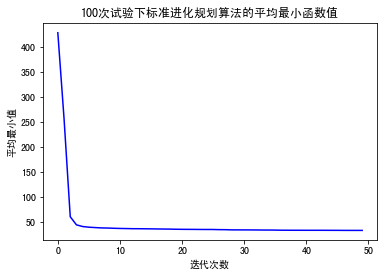

In [9]:
LB, UB = -5.12, 5.12                    # 输入变量的取值范围
N_DIM = 30                              # 输入变量的维度
MAX_ITER = 50                           # 迭代次数
POP_SIZE = 50                           # 种群规模
BETA = 1                                # 标准进化规划的参数beta
minY = [[] for _ in range(MAX_ITER)]
bestX=[]
for _ in range(100):                    # 100次试验
    # 随机生成初始种群
    x = [randomF(LB, UB, [N_DIM]) for _ in range(POP_SIZE)] 
    output = 0         
    for i in range(MAX_ITER):
        y = Rastrigr(x)
        minY[i].append(np.min(y))
        # 归一化
        cost = y/np.sum(y)
        # 生成随机向量r 
        r = [np.random.randn(N_DIM) for _ in range(POP_SIZE)]
        # 变异
        x_new = [(x[_] + r[_])*np.sqrt(BETA*cost[_]) for _ in range(POP_SIZE)]
        x_all = x + x_new 
        y_all = Rastrigr(x_all)
        # 淘汰个体
        x = [x_all[s] for s in np.argsort(y_all)[:POP_SIZE]]
    y = Rastrigr(x)
    bestX.append(x[np.argmin(y)])
        

# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in minY]
figure = plt.plot(idx, avgY,  color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均最小值")
plt.title("100次试验下标准进化规划算法的平均最小函数值")
plt.show()

## 结果分析
经过多次试验发现，影响该算法收敛的主要部分在于从函数值到费用的归一化。使用最普通的归一化函数，即$$x_i' = \frac{x_i}{\sum{x_i}}$$即可达到目前效果。